# pandas Series

In [1]:
%matplotlib inline
import sys
print(sys.version)
import numpy as np
print(np.__version__)
import pandas as pd
print(pd.__version__)
import matplotlib.pyplot as plt

3.6.2rc2 (v3.6.2rc2:8913311345, Jul  7 2017, 00:35:45) 
[GCC 4.2.1 (Apple Inc. build 5666) (dot 3)]
1.13.1
0.21.0


Series is one of the foundations of pandas as we saw in the previous video. It has a lot of helpful add-ons that bring more expressive power to the NumPy Array.

By this point, you might be getting tired of "toy data" or fake, generated data. We will get to the good data very soon. In the meantime, the toy data will help us cover a lot of important bases before things get too complicated.

In the above you can see a lot of imports. The purpose of the print statements is to reveal the version this code was run on. It can help you (and us as instructors) debug any potential issues. You don't have to use all these imports; they are just here to help. 

This is the standard set of imports that we will use going forward; it gives you the Python and pandas versions and sets some default styling, which I will get to when we cover plotting.

Let's get started with the pandas Series. I will create an array of 26 random integers between 1 and 20.

In [4]:
np.random.seed(125)
raw_np_array = np.random.randint(1,20,26)

Now I will convert that into a pandas Series using `pd.Series.from_array`. 

In [5]:
data = pd.Series.from_array(raw_np_array)

Since this is an array, we can just pass it into the Series constructor and create it that way as well.

In [8]:
pd.Series(raw_np_array)

0      3
1      4
2     15
3     14
4     12
5      1
6      6
7      3
8     14
9      1
10    19
11    13
12     1
13     3
14    10
15     4
16    13
17    16
18    13
19     8
20    10
21    10
22    18
23     5
24     5
25    12
dtype: int64

pandas is pretty smart about figuring out what you are trying to do, but it will not always get it. If you are having trouble creating an object, try to "dumb it down" for the computer; make it a simple array or something similar.

Like a Numpy array, a Series will take a best guess at what "type" of data is in the array.

In [5]:
pd.Series(['h',1,1.0])

0    h
1    1
2    1
dtype: object

The object type is the least specific; it can house Python objects, strings--pretty much anything. Like NumPy, if you have a float in your list, a Series will default to the float type.

In [6]:
pd.Series([1.0,1,2])

0    1
1    1
2    2
dtype: float64

Like a NumPy array, we can specify the type at creation as well.

In [7]:
pd.Series([1.0,1,2], dtype=np.float16)

0    1
1    1
2    2
dtype: float16

We can also specify an Index when we create a Series; this is helpful if you have a special way that you want to query the data.

In [8]:
pd.Series(list(range(5)),index=list('abcde'))

a    0
b    1
c    2
d    3
e    4
dtype: int64

Now that we have covered how to create a Series, let's try some Series methods to learn a little bit more about querying in pandas.

In [6]:
data

0      3
1      4
2     15
3     14
4     12
5      1
6      6
7      3
8     14
9      1
10    19
11    13
12     1
13     3
14    10
15     4
16    13
17    16
18    13
19     8
20    10
21    10
22    18
23     5
24     5
25    12
dtype: int64

Again, just as with NumPy, we will have a shape as well as a length.

In [8]:
data.shape

(26,)

In [9]:
data.size

26

In [10]:
len(data)

26

As we saw briefly in the last video, all pandas types have a `head` and a `tail`.  These methods let us take values off the top and the bottom of a Series.

In [12]:
print(data.head())
print(data.tail())

0     3
1     4
2    15
3    14
4    12
dtype: int64
21    10
22    18
23     5
24     5
25    12
dtype: int64


We can specify the number of values that we would like returned as well.

In [11]:
data.head(2)

0    3
1    4
dtype: int64

In [12]:
data.tail(10)

16    13
17    16
18    13
19     8
20    10
21    10
22    18
23     5
24     5
25    12
dtype: int64

Since we are working with a list of numbers, we may want to compute some numeric properties of this Series. Like NumPy, the Series often makes this exceptionally easy.

In [13]:
data.mean()

8.9615384615384617

In [14]:
data.mode()

0     1
1     3
2    10
3    13
dtype: int64

In [15]:
data.median()

10.0

In [16]:
data.count()

26

We can get the unique values and the counts of each value with a single method call as well.

In [17]:
data.unique()

array([ 3,  4, 15, 14, 12,  1,  6, 19, 13, 10, 16,  8, 18,  5])

In [18]:
data.value_counts()

13    3
10    3
3     3
1     3
14    2
12    2
5     2
4     2
19    1
18    1
16    1
15    1
8     1
6     1
dtype: int64

Getting these summary statistics is such a common task that they are actually combined in a simple method called `describe`. Think of this as getting a simple summary of the data.

In [19]:
data.describe()

count    26.000000
mean      8.961538
std       5.574806
min       1.000000
25%       4.000000
50%      10.000000
75%      13.000000
max      19.000000
dtype: float64

This would be an appropriate time to show you our first graphical representation. We just computed a frequency distribution, or the number of occurances for each value. It would be helpful to see this graphically as a histogram.

This is extremely simple with the `.hist()` command. 

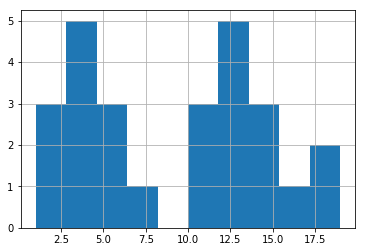

In [20]:
data.hist()

Now we have our first graph. I hope you are starting to see how expressive pandas can be. We have done some high-level and widely applicable things with just a few method calls. This is what makes Python and pandas so powerful. You are operating with a first-class programming language, and within that, you have an easy matrix-style numerical representation.

Let's continue.

## Lookups and Indexes

Let's take a closer look at getting data (either values or portions) out of our pandas Series. This should feel somewhat familiar from our work in NumPy and with lists. Let's start by getting a specific value out of our data.

In [23]:
data

0      3
1      4
2     15
3     14
4     12
5      1
6      6
7      3
8     14
9      1
10    19
11    13
12     1
13     3
14    10
15     4
16    13
17    16
18    13
19     8
20    10
21    10
22    18
23     5
24     5
25    12
dtype: int64

In [23]:
r_data = data.copy()
r_data.index = reversed(range(26))
r_data

25     3
24     4
23    15
22    14
21    12
20     1
19     6
18     3
17    14
16     1
15    19
14    13
13     1
12     3
11    10
10     4
9     13
8     16
7     13
6      8
5     10
4     10
3     18
2      5
1      5
0     12
dtype: int64

In [24]:
data[20]

10

In [25]:
r_data[20]

1

Remember that we are not querying by row (as much as it might seem like it). That is why we created the reversed index, to drive home the point that we are working with an index, not by a row.

Because we are working with an index, we can fetch multiple indices easily as well.

In [26]:
data[[10,20]]

10    19
20    10
dtype: int64

In [27]:
r_data[10:20]

15    19
14    13
13     1
12     3
11    10
10     4
9     13
8     16
7     13
6      8
dtype: int64

however, when we slice the series, it will query by the row numbers

In [28]:
r_data[[10,20]]

10    4
20    1
dtype: int64

We can see here that it returned this as another pandas series with the same index values. This will come in handy later on.

We mentioned above that when we are querying in a dictionary lookup style on a series, we are querying the index. That is not *exactly* true because if we do not have a **numerical index**, pandas will perform the lookup by numerical row/index number.

In [29]:
d2 = data.copy() 
# copy creates a copy of the data so we don't modify the original one

In [30]:
import string

In [31]:
d2.index = list(string.ascii_uppercase)
d2.head()

A     3
B     4
C    15
D    14
E    12
dtype: int64

In [34]:
d2[4]

12

We can of course query by the actual index values or with multiple values, or a list of values.

In [33]:
d2['E']

12

In [19]:
d2[[0,4]]

A     3
E    12
dtype: int64

In [20]:
d2[0:4]

A     3
B     4
C    15
D    14
dtype: int64

In [24]:
d2['A':'D']

A     3
B     4
C    15
D    14
dtype: int64

In [25]:
d2[['A','D']]

A     3
D    14
dtype: int64

Things may start to get a bit tricky because you will see why it is so important to make sure that you understand which index you are working on. We will be working off of a portion of the original Series.

In [35]:
data

0      3
1      4
2     15
3     14
4     12
5      1
6      6
7      3
8     14
9      1
10    19
11    13
12     1
13     3
14    10
15     4
16    13
17    16
18    13
19     8
20    10
21    10
22    18
23     5
24     5
25    12
dtype: int64

In [36]:
d3 = data[5:10]
d3

5     1
6     6
7     3
8    14
9     1
dtype: int64

We can see here that this is a Series with a numerical index, so let's query using the number 5.

In [37]:
d3[5]

1

It works just as expected. Now let's query for zero.

In [38]:
d3[0]

KeyError: 0

We get a KeyError because that value does not exist in the index, so you can see that you must always keep your indexing straight. If we want to enforce getting by row number, we have to use the `iget` method, which allows us to query for one or many values.

In [39]:
d3.iget(0)

AttributeError: 'Series' object has no attribute 'iget'

In [40]:
d3.iget([0,3])

AttributeError: 'Series' object has no attribute 'iget'

In [41]:
d3

5     1
6     6
7     3
8    14
9     1
dtype: int64

We can also use the `iloc` lookup to do the same thing. Think about this as the index location; however, notice how it is **dictionary style instead of a method call.**

In [42]:
d3.iloc[[0,3]]

5     1
8    14
dtype: int64

There is one other style of lookup that we need to cover. There are many cases in which we want to get certain values and if any do not exist, we  want to fill them in with a `NaN` value or just ignore that they do not exist. We can do that with the `ix` lookup, which will query by index value and fail silently by replacing a missing index value with `NaN`.

In [45]:
d3.ix[[0,7,12]]

0    NaN
7      3
12   NaN
dtype: float64

Now we have seen a couple of different methods and properties that help you look things up along the index. So which is best? 

That is a harder question to answer because some are more efficient than others in some circumstances. My recommendation would be that you try and be explicit with your commands and be careful about confusing indexes. I try to use dictionary style lookups `iloc` and `ix`.

## Boolean Selection

Now that we better understand these explicit ways of querying data, we can talk about Boolean selection, which will feel familiar after NumPy. Let’s see which values in our Series are under 10.

In [29]:
data

0      3
1      4
2     15
3     14
4     12
5      1
6      6
7      3
8     14
9      1
10    19
11    13
12     1
13     3
14    10
15     4
16    13
17    16
18    13
19     8
20    10
21    10
22    18
23     5
24     5
25    12
dtype: int64

In [30]:
lt10 = data < 10
lt10

0      True
1      True
2     False
3     False
4     False
5      True
6      True
7      True
8     False
9      True
10    False
11    False
12     True
13     True
14    False
15     True
16    False
17    False
18    False
19     True
20    False
21    False
22    False
23     True
24     True
25    False
dtype: bool

In [31]:
data[lt10]

0     3
1     4
5     1
6     6
7     3
9     1
12    1
13    3
15    4
19    8
23    5
24    5
dtype: int64

Of course, we do not have to save any intermediate values; we can just perform this selection inline.

In [32]:
data[data < 10]

0     3
1     4
5     1
6     6
7     3
9     1
12    1
13    3
15    4
19    8
23    5
24    5
dtype: int64

If we want to combine more than one condition to create a selection, we have to use the `&` or `|` symbols. Notice that it is not correct to use `and` in this case.

In [33]:
data[data < 10 and data > 5]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [34]:
# & or | instead of 'and' or 'or' keywords, although with parenthesis
data[(data < 10) & (data > 5)]

6     6
19    8
dtype: int64

We can also chain selections one after another instead of doing it all in one statement. This is equivalent to an `and` statement.

In [35]:
data[data < 10][data > 5]

6     6
19    8
dtype: int64

There are times when you may not care how many values are in a Series; you just want to know if any satisfy a Boolean requirement. For example, is any value in a Series less than 2? This is where the `any` and `all` keywords come in; `any` will tell you if any of the values are true. You can either provide a Series to `any` as a parameter or just use it as a method as follows.

In [53]:
data[data < 10].any()

True

In [54]:
data[data > 50].any()

False

In [55]:
(data > 50).any()

False

`All` will check if all values are True.

In [56]:
(data > 0).all()

True

In [57]:
(data > 10).all()

False

In [58]:
data > 5

0     False
1     False
2      True
3      True
4      True
5     False
6      True
7     False
8      True
9     False
10     True
11     True
12    False
13    False
14     True
15    False
16     True
17     True
18     True
19     True
20     True
21     True
22     True
23    False
24    False
25     True
dtype: bool


One thing we can take advantage of in pandas is that `sum` will count True as 1 and False as 0, so performing a `sum` of these Boolean selections allows you to get the counts pretty easily.


In [59]:
(data > 5).sum()

16

## Slicing


We have already seen slicing in other contexts. Let's see how to apply it to pandas Series. 


In [60]:
data.head()

0     3
1     4
2    15
3    14
4    12
dtype: int64

In [61]:
r_data.head()

25     3
24     4
23    15
22    14
21    12
dtype: int64

In [62]:
data[0:5]

0     3
1     4
2    15
3    14
4    12
dtype: int64

In [63]:
r_data[0:5]

25     3
24     4
23    15
22    14
21    12
dtype: int64

We can see here that a slice **ignores the index in favor of a 0-based lookup, even if the index is numerical. **

We can also do a slice using steps.  We can also take everything up to a certain value, or beyond a certain value.

In [64]:
data[0:10:2]

0     3
2    15
4    12
6     6
8    14
dtype: int64

In [65]:
data[:5]

0     3
1     4
2    15
3    14
4    12
dtype: int64

In [66]:
data[20:]

20    10
21    10
22    18
23     5
24     5
25    12
dtype: int64

We can also index backwards from the end of the Series.

In [67]:
data[-2:]

24     5
25    12
dtype: int64

In [68]:
data.tail(2)

24     5
25    12
dtype: int64

A powerful feature of slicing is that we can substitute in new values.  Be careful when you do this: we are not using a copy of the data; we are using the original data.

In [69]:
data.head()

0     3
1     4
2    15
3    14
4    12
dtype: int64

In [70]:
d4 = data.head()
d4

0     3
1     4
2    15
3    14
4    12
dtype: int64

In [71]:
d4[0] = 10000

In [72]:
data

0     10000
1         4
2        15
3        14
4        12
5         1
6         6
7         3
8        14
9         1
10       19
11       13
12        1
13        3
14       10
15        4
16       13
17       16
18       13
19        8
20       10
21       10
22       18
23        5
24        5
25       12
dtype: int64

This is an important point to be aware of and can get you in trouble if you're not careful. In fact, it happened while I was writing this very notebook. Before you start to change a Series, it is usually good practice to make a copy of it so that you do not modify the original one.

Whenever you run into bugs, be sure to know whether you are actually modifying the original Series or DataFrame.

In [73]:
d5 = data.head().copy()

In [74]:
d5[0] = 2000

In [75]:
data

0     10000
1         4
2        15
3        14
4        12
5         1
6         6
7         3
8        14
9         1
10       19
11       13
12        1
13        3
14       10
15        4
16       13
17       16
18       13
19        8
20       10
21       10
22       18
23        5
24        5
25       12
dtype: int64

## NaN Values

NaN values are treated differently in pandas than they are in NumPy because pandas makes some assumptions about how you want them handled. We saw earlier that with NaN and NumPy you will not get any values back if you have a NaN value in your array.

In [76]:
np_array = np.array([1,2,3,np.nan])
np_array

array([  1.,   2.,   3.,  nan])

In [77]:
np_array.mean()

nan

In [78]:
pd_series = pd.Series([1,2,3,np.nan])
pd_series

0     1
1     2
2     3
3   NaN
dtype: float64

pandas Series treats them differently; it just ignores that empty value. That is often what you want, but not 100 percent of the time.  There are some situations in which you may need to treat missing values as zero; it really depends on your use case.

We will cover filling in empty values at a later time.

In [79]:
pd_series.mean()

2.0

# Reindexing

Sometimes you will to need to reindex or reset an index in pandas. For example, this can happen after you concatenate two Series. When you reset an index, you erase the index you have currently and create a new one. Let’s walk through a practical example.

In [4]:
np.random.seed(567)

In [37]:
s1 = pd.Series(np.random.randn(5))
s1

0    0.940636
1   -0.294609
2   -1.308496
3   -1.551241
4    0.100501
dtype: float64

In [52]:
s2 = pd.Series(np.random.randn(5))
s2

0   -1.812594
1    0.213351
2   -1.366213
3    1.000912
4   -0.038212
dtype: float64

In [59]:
help(np.random.randn)

Help on built-in function randn:

randn(...) method of mtrand.RandomState instance
    randn(d0, d1, ..., dn)
    
    Return a sample (or samples) from the "standard normal" distribution.
    
    If positive, int_like or int-convertible arguments are provided,
    `randn` generates an array of shape ``(d0, d1, ..., dn)``, filled
    with random floats sampled from a univariate "normal" (Gaussian)
    distribution of mean 0 and variance 1 (if any of the :math:`d_i` are
    floats, they are first converted to integers by truncation). A single
    float randomly sampled from the distribution is returned if no
    argument is provided.
    
    This is a convenience function.  If you want an interface that takes a
    tuple as the first argument, use `numpy.random.standard_normal` instead.
    
    Parameters
    ----------
    d0, d1, ..., dn : int, optional
        The dimensions of the returned array, should be all positive.
        If no argument is given a single Python float is ret

In [7]:
combo = pd.concat([s1, s2])
combo

0    0.213266
1   -0.091899
2   -0.089349
3    0.265756
4    0.376065
0    0.688025
1    0.510002
2    1.914120
3    0.724774
4    0.124588
dtype: float64

When we concatenate these Series, we can see that we get repeated index values. We can query just like we would normally by these index values, but in all likelihood we will want to replace them with new ones. 

This is an important concept because indexes **do not have to be unique**. They can have duplicates and when we query for values, we will get those duplicates back.

In [9]:
combo[0]

0    0.213266
0    0.688025
dtype: float64

We could reset the index by overwriting it with a new value, as we have done previously.

In [13]:
combo.index = range(combo.count())
combo

0    0.213266
1   -0.091899
2   -0.089349
3    0.265756
4    0.376065
5    0.688025
6    0.510002
7    1.914120
8    0.724774
9    0.124588
dtype: float64

If we want to select and reorder items in our Series, we could use the handy `reindex` method.  Notice that this returns a new Series.

In [14]:
new_combo = combo.reindex([0,2,15,21])
new_combo

0     0.213266
2    -0.089349
15         NaN
21         NaN
dtype: float64

In the last code block, notice that we passed some nonexistent index values to the `reindex` method.  By default, these are filled in with `NaN`.  In some cases, we may want to specify a different default value using `fill_value`. We can also specify a method by which missing values should be filled. This can performed during the reindexing using the method parameter or we can do it after the fact.

In [15]:
combo.reindex([0,2,15,21], fill_value=0)

0     0.213266
2    -0.089349
15    0.000000
21    0.000000
dtype: float64

In [16]:
new_combo.fillna(0)

0     0.213266
2    -0.089349
15    0.000000
21    0.000000
dtype: float64

There are other handy methods for filling in missing values. Let's reset some values so we can keep experimenting.

In [19]:
new_combo[2] = np.NaN

In [20]:
new_combo[21] = 5

In [21]:
new_combo

0     0.213266
2          NaN
15         NaN
21    5.000000
dtype: float64

We can forward fill and back fill, which means we copy the last value before the NaN or the next value after it and copy it.

In [92]:
new_combo.ffill()

0     0.213266
2     0.213266
15    0.213266
21    5.000000
dtype: float64

In [93]:
new_combo.bfill()

0     0.213266
2     5.000000
15    5.000000
21    5.000000
dtype: float64

As we saw above, we can replace NaNs with an arbitrary value. 

In [22]:
new_combo.fillna(12)

0      0.213266
2     12.000000
15    12.000000
21     5.000000
dtype: float64

Lastly, we can fill missing values using an interpolation method. For example, we can use a linear function to fill in values between the two boundary values.

In [23]:
new_combo[0] = 2

In [24]:
new_combo

0      2
2    NaN
15   NaN
21     5
dtype: float64

In [26]:
new_combo.interpolate() # default is linear 

0     2
2     3
15    4
21    5
dtype: float64

There are other ways to fill in missing values, but these are the ones you are most likely to need.

## Operating on Multiple Series

Let's cover how we can combine different Series on certain values and perform simple arithmetic operations.

When s1 and s2 have the same index, it is easy to do things like add them together.  We basically get exactly what we expect.

In [39]:
s1

0    0.940636
1   -0.294609
2   -1.308496
3   -1.551241
4    0.100501
dtype: float64

In [40]:
s2

0   -0.346973
1    0.268793
2   -0.852633
3   -0.968861
4   -0.029575
dtype: float64

In [41]:
s1 + s2

0    0.593663
1   -0.025816
2   -2.161129
3   -2.520102
4    0.070926
dtype: float64


However, things get more complicated when they have different indices. Now when we try and add them, it only does so on the overlapping index labels. Often this may be what we want when we are analyzing data, but other times it is not. In order to handle that we need to do some reindexing and use fill values. 


In [42]:
s2.index = list(range(3,8))
s2

3   -0.346973
4    0.268793
5   -0.852633
6   -0.968861
7   -0.029575
dtype: float64

In [43]:
s1 + s2

0         NaN
1         NaN
2         NaN
3   -1.898214
4    0.369294
5         NaN
6         NaN
7         NaN
dtype: float64

In [45]:
s1.reindex(range(10),fill_value=0) + s2.reindex(range(10),fill_value=0)

0    0.940636
1   -0.294609
2   -1.308496
3   -1.898214
4    0.369294
5   -0.852633
6   -0.968861
7   -0.029575
8    0.000000
9    0.000000
dtype: float64

In [46]:
s1.reindex(range(10),fill_value=0)

0    0.940636
1   -0.294609
2   -1.308496
3   -1.551241
4    0.100501
5    0.000000
6    0.000000
7    0.000000
8    0.000000
9    0.000000
dtype: float64

In [34]:
s1 = pd.Series(range(1,4), index= ['a','a','c'])
s1

a    1
a    2
c    3
dtype: int64

In [35]:
s2 = pd.Series(range(1,4), index=['a','a','b'])
s2

a    1
a    2
b    3
dtype: int64


Finally we might be in a situation in which a Series has multiple items with the same index value. When we combine Series like this, we usually end up with every possible combination for a given index. For example, multiplying Series s1 and s2 above is equal to performing a Cartesian product on each specific label, as shown below.


In [36]:
s1 * s2

a     1
a     2
a     2
a     4
b   NaN
c   NaN
dtype: float64


Adding them together means every possible value for an index in s1 is added to every possible value for that index in s2.

In [107]:
s1 + s2

a     2
a     3
a     3
a     4
b   NaN
c   NaN
dtype: float64

## Map

By this point, you should already be familiar with the basics of mapping in Python.  We can apply the same principles to Series; we will just create a new Series instead of a list.

As we saw for lists we can map using a function or using a dictionary.

In [109]:
s1

a    1
a    2
c    3
dtype: int64

In [110]:
s1.map(lambda x: x ** 2)

a    1
a    4
c    9
dtype: int64

In [111]:
s1.map({1:2,2:3,3:12})

a     2
a     3
c    12
dtype: int64

If Python does not find a value in the dictionary we supply, mapping will return NaN.

In [112]:
s1.map({2:3,3:12})

a   NaN
a     3
c    12
dtype: float64

This is a powerful technique because it allows us a lot of flexibility in filling in missing values or swapping values out.

The pandas Series is a foundational part of pandas that you will use over and over in your time as a data scientist. The material in this lesson is important, and we will build on it as we go forward.  Please take your time and absorb everything carefully.